# Algoritmo de Machine Learning
# Árvore de decisão

## É uma representação de um conjunto para tomar qualquer decisão. Podemos representar cada vértice da árvore como uma decisão ou pergunta a ser feita, a depender da resposta determinaremos qual aresta iremos seguir, ate chegarmos no vértice final (Nó-Folha)

<br>
<img src="tree-graphic.webp" >

### A Àrvore de decisão por si so não é um algoritmo de machine learning, a árvore é uma estrutura de dados, o que é realmente é o machine learning é a escolha das regras para criação dessa arvore por meio de procedimentos probabilisticos

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

#Importando a base iris
from sklearn.datasets import load_iris

In [4]:
#Base de dados referentes a informações de plantas
data = load_iris()

In [10]:
#Preparando nossa base
iris = pd.DataFrame(data.data)
#Introduzindo o nome das colunas
iris.columns = data.feature_names
#Criando nova coluna para a classificação
iris['target'] = data.target

iris.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Vamos dividir nossa base para fazermos um teste com uma quantidade menor de dados

In [19]:
#Dividino nossa base
iris1 = iris.loc[iris.target.isin([0,1]), ['petal length (cm)','petal width (cm)','target']]
iris1

,petal length (cm),petal width (cm),target
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
95,4.2,1.2,1
96,4.2,1.3,1
97,4.3,1.3,1
98,3.0,1.1,1


In [20]:
X = iris1.drop('target',axis=1)
Y = iris1.target

In [22]:
#fazendo o train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

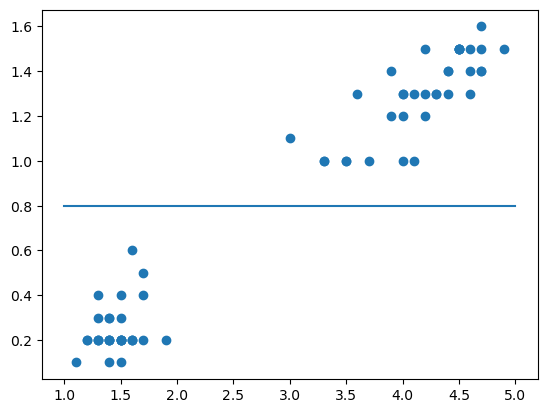

In [38]:
plt.scatter(X_train['petal length (cm)'], X_train['petal width (cm)'])
plt.plot([1,5],[0.8,0.8])
plt.show()

In [32]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_train, y_train)

1.0

In [44]:
y_pred = clf.predict(X_test)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[19,  0],
       [ 0, 14]], dtype=int64)

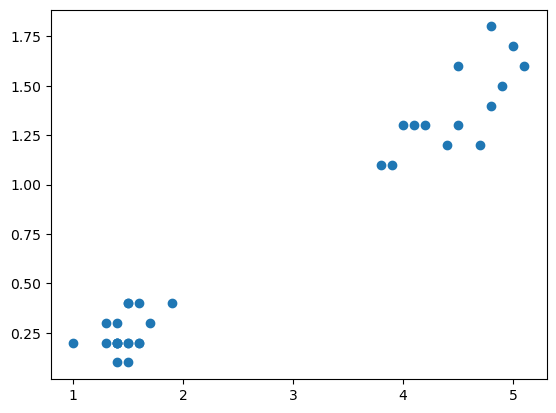

In [45]:
plt.scatter(X_test['petal length (cm)'], X_test['petal width (cm)'])
plt.show()

# Vamos então avaliar nosso modelo

In [65]:
#Separando nossa base
Y = iris.target
X = iris.drop(['target'],axis=1)

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [66]:
from sklearn import tree
clf2 = tree.DecisionTreeClassifier()
clf2 = clf.fit(X_train, y_train)
clf2.score(X_train, y_train)

1.0

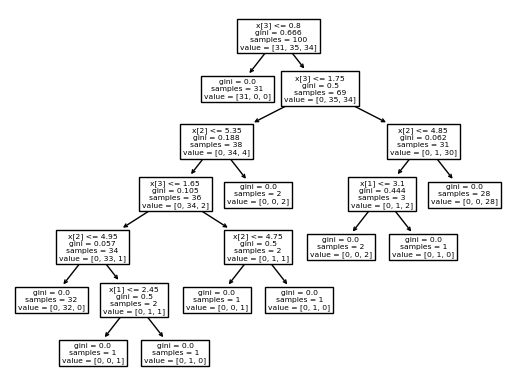

In [60]:
tree.plot_tree(clf2)
plt.show()

In [63]:
y_pred2 = clf2.predict(X_test)
confusion_matrix(y_test,y_pred2)

array([[19,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 15]], dtype=int64)